### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Image enhancement algorithms in the spatial domain**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction





### Importing libraries

In [25]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import time


### Loading Images

In [7]:
# Loading images
moon = Image.open("data/moon.jpg")
fingerprint = Image.open("data/fingerprint.png")
plans = Image.open("data/plans.jpg")
dragon = Image.open("data/dragon.png")

In [18]:
def plot_images(images=[], labels=[], nrows=1, ncols=2, figsize=(12,8), cmap="gray"):
    """
    plot a set of images
    """
    # set the subplots
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    # Iterate over each axis defined in M*N as flat
    for i, ax in enumerate(axs.flat):
        # validates that the dimensions of axs fits with images array parameter
        if i < len(images):
            # plot the image
            ax.imshow(images[i], cmap=cmap)
            # if there are labels defined then set a title
            if len(labels) > 0:
                ax.set_title(labels[i])
            # dont show the axis ticks 
            ax.axis("off")
        else:
            # dont show an empty plot
            ax.axis("off")
    # fits the plots 
    plt.tight_layout()
    plt.show()
    
    
def execution_time(func, *args, **kwargs):
    """
    Mesure the execution time of a function
    """
    # initial time
    start_time = time.perf_counter()
    # run the function
    result = func(*args, **kwargs)
    # end execution
    end_time = time.perf_counter()
    # calculate the execution time
    exec_time = end_time - start_time
    # return the execution time
    return result, exec_time

### 1. Line Detectors

#### 1.1 Prewitt


Time execution: 0.8520720020001136


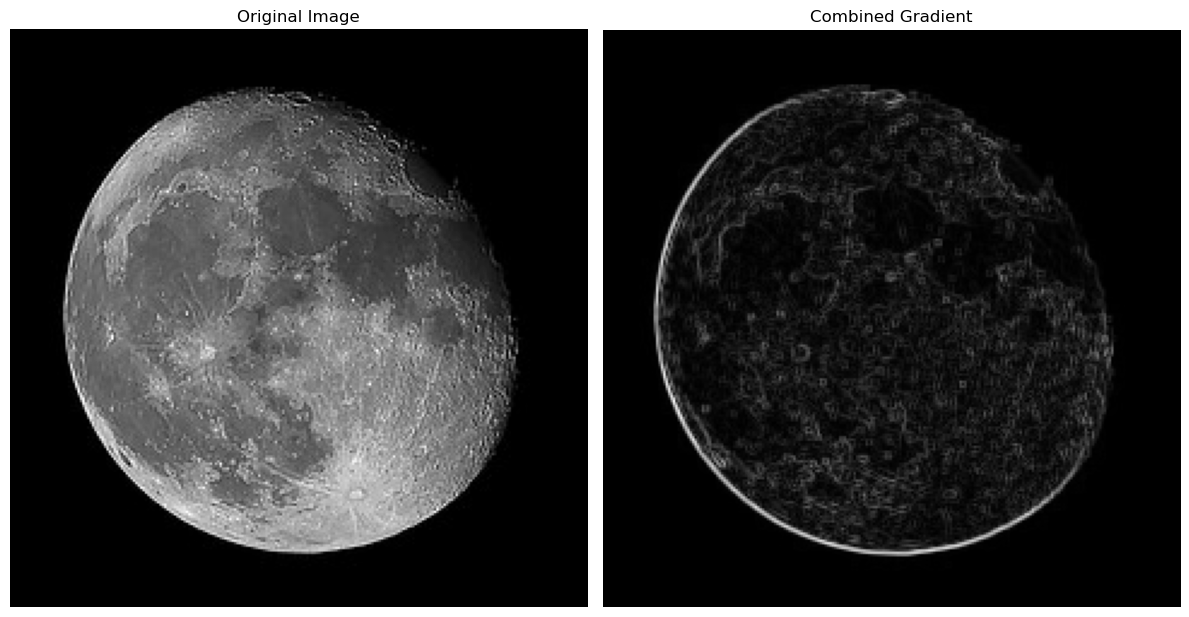

In [ ]:
def prewitt(image):
    # normalizie the image
    image = np.array(image, dtype=np.float32) / 255.0

    # Prewitt kernels
    # getting Gx
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    # getting Gy
    prewitt_y = np.array([[-1, -1, -1], [ 0,  0,  0], [ 1,  1,  1]])

    # Get height and widht of the image
    height = image.shape[0]
    width = image.shape[1]

    # Initialize array for edges
    edges_x = np.zeros((height, width))
    edges_y = np.zeros((height, width))

    # Applying Prewitt method
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Executes n*n = n^2 times O(n^2)
            region = image[i-1:i+2, j-1:j+2]

            x_result = np.sum(region * prewitt_x)
            y_result = np.sum(region * prewitt_y)

            edges_x[i, j] = x_result
            edges_y[i, j] = y_result

    edges_combined = np.sqrt(edges_x**2 + edges_y**2)
    return edges_combined

# converting the imageinto gray scale
gray = moon.convert("L")

result, exect_time = execution_time(prewitt, gray)

print(f"Time execution: {exect_time}")
plot_images(images=[gray, result], labels=["Original Image", "Combined Gradient"])


**Algorithmic Complexity**

The algorithmic complexity of this method is O(n), as the image is traversed pixel by pixel in this method.


**Reference**

https://www.geeksforgeeks.org/edge-detection-using-prewitt-scharr-and-sobel-operator/

#### 1.2 Sobel

Execution time 6.5292528430004495


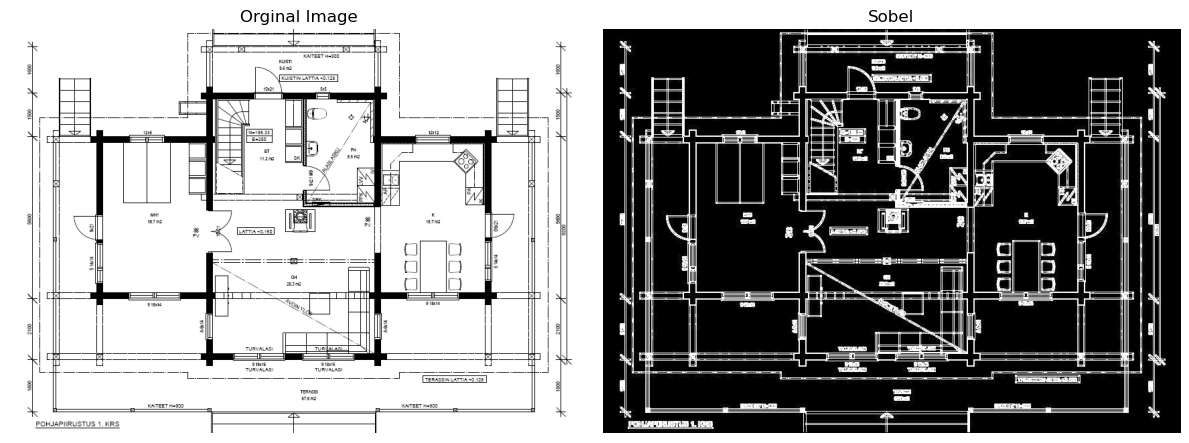

In [27]:
def sobel(image):
    # normalizie the image
    image = np.array(image, dtype=np.float32) / 255.0

    # define Sobel filters
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Get height and widht of the image
    height = image.shape[0]
    width = image.shape[1]


    # Initialize empty array for edges
    gradient_x = np.zeros_like(image)
    gradient_y = np.zeros_like(image)

    # Appliying Sobel method
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Executes n*n = n^2 times O(n^2)
            region = image[i - 1:i + 2, j - 1:j + 2]
            gradient_x[i, j] = np.sum(region * sobel_x)
            gradient_y[i, j] = np.sum(region * sobel_y)

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # normalizie the magnitud
    gradient_magnitude = np.clip(gradient_magnitude, 0, 1)
    
    return gradient_magnitude

# Convert image into gray
plans = plans.convert("L")
result, exect_time = execution_time(sobel, plans)
print(f"Execution time {exect_time}")
plot_images(images=[plans, result], labels=["Orginal Image", "Sobel"])

**Algorithmic Complexity**

The algorithmic complexity of this method is O(n), as the image is traversed pixel by pixel in this method.

**Reference:**

https://medium.com/@haidarlina4/sobel-vs-canny-edge-detection-techniques-step-by-step-implementation-11ae6103a56a


#### 1.3 Laplaciano

*Explain which algorithm is more efficient*

### 2. Image enhancement algorithms
Implement an image enhancement or enhancement algorithm through an algorithm in which the lines are extracted from the image and then the difference with the original image is applied, multiplying the pixels of the “mask” image (the lines found) by a alpha factor greater than 1.




### 3. A Case Study in Medical Imaging (PET images)

### Conclusion

*Team conclusion*

### References

*add references*